In [ ]:
from 

In [2]:
import numpy as np
import pandas as pd

In [97]:
x_train = pd.read_csv("x_chest_training.csv")
y_train = pd.read_csv("y_chest_training.csv")

In [98]:
x_test = pd.read_csv("x_chest_test.csv")
y_test = pd.read_csv("y_chest_test.csv")

In [99]:
x_full = pd.concat([x_train, x_test], axis=0)
y_full = pd.concat([y_train, y_test], axis=0)

In [ ]:
y_full.value_counts()

In [18]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib as plt
import matplotlib.pyplot as plt_py

In [89]:
kmeans6 = KMeans( n_clusters=6 ) 
#init='k-means++' another way to initialize the model
kmeans6.fit( x_full, y_full )

/Users/ricardoangelperez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=6)

In [103]:
x_full.shape

(82282, 784)

In [104]:
y_full.shape

(82282, 1)

In [91]:
x_full[ 'kmeans6Cluster' ] = kmeans6.labels_

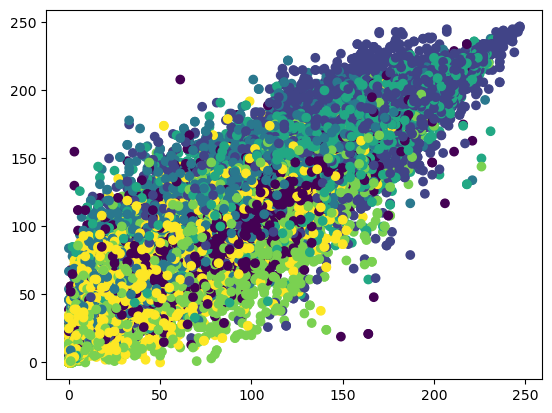

In [92]:
kmeans6_plot_168_224 = matplotlib.pyplot.scatter( x_full['168'], x_full['224'], c=x_full.kmeans6Cluster)
#c = is what we are coloring by (the given cluster)

In [ ]:
#7 clusters

In [7]:
kmeans7 = KMeans( n_clusters=7 ) 
#init='k-means++' another way to initialize the model
kmeans7.fit( x_full, y_full )

/Users/ricardoangelperez/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7)

In [9]:
x_full[ 'kmeans7Cluster' ] = kmeans7.labels_
#store the cluster as a column
#let's do half as many clusters as there as classes


In [11]:
x_full.groupby( 'kmeans7Cluster' )['350'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
kmeans7Cluster,,,,,,,,
0,11019.0,193.15,21.14,65.0,179.0,195.0,211.0,251.0
1,14881.0,173.10,13.78,79.0,166.0,175.0,182.0,219.0
2,9297.0,164.20,24.71,0.0,147.0,168.0,182.0,230.0
3,10422.0,195.21,20.79,63.0,181.0,199.0,211.0,249.0
4,13488.0,155.99,22.07,44.0,143.0,160.0,172.0,217.0
5,12889.0,134.50,20.99,24.0,125.0,134.0,146.0,215.0
6,10286.0,150.26,25.32,32.0,134.0,152.0,169.0,224.0


In [88]:
x_full

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,kmeans7Cluster
0,68,79,76,75,86,79,73,84,82,72,...,220,217,219,219,217,211,206,200,178,4
1,11,11,11,11,11,16,26,45,78,70,...,199,195,192,185,178,172,162,148,121,4
2,1,1,1,1,3,30,73,94,116,126,...,205,200,198,197,193,189,184,175,155,6
3,19,51,86,86,75,73,66,64,61,72,...,169,159,150,139,126,90,18,5,39,2
4,3,16,58,16,5,6,7,11,21,61,...,215,199,184,157,126,63,9,4,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18270,12,12,12,12,12,12,12,15,27,47,...,196,207,209,208,202,187,177,188,170,4
18271,12,12,14,18,20,23,29,35,42,55,...,242,241,239,240,241,241,237,223,203,3
18272,8,11,12,22,56,59,57,26,19,45,...,215,209,201,186,146,50,12,11,9,1
18273,17,1,1,2,2,1,1,4,32,65,...,168,170,122,33,1,1,1,2,2,2


In [24]:
centroids7 = kmeans7.cluster_centers_
centroids7.shape

(7, 784)

In [30]:
#given the array centroid7, let's see where the clusters vary most by attribute 
centroids7_vars = np.var(centroids7, axis=0)#[:, attribute_index], axis=0
centroids7_vars.shape

(784,)

In [31]:
centroids7_vars

array([  87.4792431 ,  152.30163383,  190.37472982,  225.33084771,
        256.1052668 ,  292.04988753,  336.80106983,  394.38048453,
        487.59418474,  598.67549725,  612.52196067,  502.2108656 ,
        415.07639599,  371.47408812,  367.25311806,  402.04499565,
        456.78214765,  528.65383409,  534.79227233,  440.75239308,
        334.42291302,  260.37167946,  224.46938109,  204.28594344,
        168.35480866,  130.03794474,  104.88158629,   70.37421782,
        276.13199909,  466.55780473,  564.70577942,  631.84189577,
        682.40155722,  725.63193511,  764.73333979,  807.18470005,
        871.5066216 ,  922.26528538,  853.1393191 ,  697.72054643,
        568.1474453 ,  491.71141836,  485.20075999,  549.86317085,
        654.02184343,  765.96264533,  840.21423309,  807.25365743,
        739.20081748,  693.34066434,  668.38840981,  644.79048432,
        570.24847019,  502.28715167,  435.25938752,  299.81035524,
        543.13182227,  867.50346258,  955.87754765,  979.58854

In [34]:
centroids7_vars.argmax()

702

In [41]:
idx_var_center = np.argsort(-centroids7_vars)

In [43]:
idx_var_center

array([702, 730, 674, 646, 618, 731, 703, 758, 590, 675, 589, 561, 562,
       753, 725, 617, 533, 697, 759, 669, 752, 641, 645, 505, 647, 724,
       613, 781, 673, 534, 477, 701, 696, 585, 780, 586, 614, 558, 729,
       449, 619, 506, 642, 530, 668, 557, 757, 670, 502, 421, 478, 732,
       474, 698, 640, 591, 529, 704, 726, 393, 450, 504, 446, 532, 476,
       751, 754, 501, 612, 560, 448, 422, 782, 418, 760, 676, 723, 365,
       563, 531, 473, 559, 503, 588, 420, 779, 394, 587, 475, 390, 584,
       445, 392, 695, 337, 447, 616, 615, 535, 366, 417, 648, 364, 362,
       419, 556, 644, 643, 309, 389, 667, 336, 338, 141, 507, 113, 391,
       196, 308, 334, 620, 168, 169, 672, 281, 224, 671, 361, 733, 280,
       140, 252, 528, 639, 750, 479, 197, 363, 310, 253, 700, 705, 225,
       114, 306, 699, 451, 722,  85, 728, 500, 138, 333, 756, 592,  86,
       166, 142, 335, 761, 423, 112, 611, 778, 278, 282, 395, 727, 194,
       472, 677,  87, 307, 250, 222, 110, 367, 170, 167, 694, 13

In [45]:
idx_center_array = np.array(idx_numbers_center)
# Filter 'idx_var_center' to keep only the indices that are present in 'inner_numbers_list'
idx_var_center_filtered = idx_var_center[np.isin(idx_var_center, idx_center_array)]

In [46]:
idx_var_center_filtered

array([168, 169, 224, 197, 142, 194, 167, 195, 305, 279, 223, 109, 254,
       251, 139, 339, 143, 360, 164, 255, 199, 227, 220, 119, 269, 191,
       319, 239, 237, 265, 120, 284, 208, 209, 207, 181, 287, 155,  99,
       179, 259, 153, 219, 323, 129, 288, 359, 233, 322, 131, 299, 271,
       303, 203, 215, 149, 379, 186, 341, 175, 159, 189, 246])

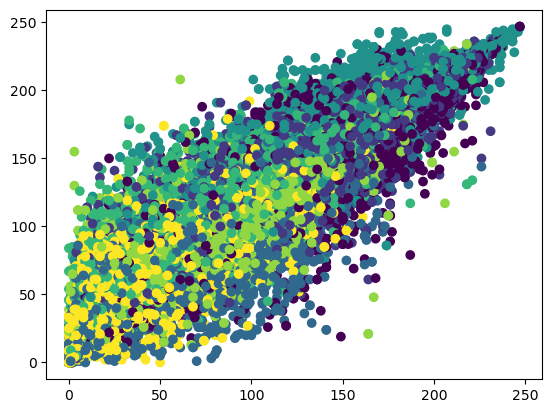

In [47]:
kmeans7_plot_168_224 = matplotlib.pyplot.scatter( x_full['168'], x_full['224'], c=x_full.kmeans7Cluster)
#c = is what we are coloring by (the given cluster)


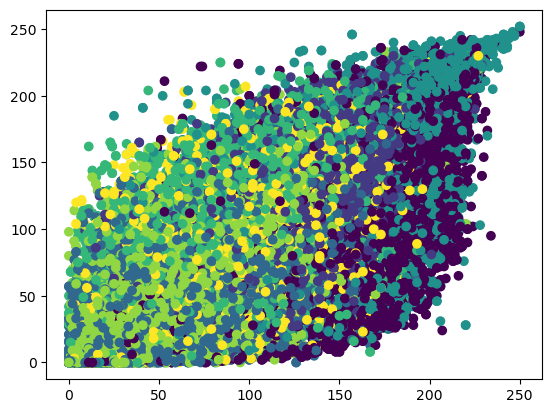

In [48]:
kmeans7_plot_194_279 = matplotlib.pyplot.scatter( x_full['194'], x_full['279'], c=x_full.kmeans7Cluster)
#c = is what we are coloring by (the given cluster)
#194 279

In [67]:
centroids7_df = pd.DataFrame(centroids7)
centroids7_df



,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,44.138632,47.975322,53.112865,57.314553,60.854291,64.792506,69.724460,76.443386,87.532843,105.393758,...,195.280893,191.596081,186.554890,179.888586,169.489022,152.523226,125.721738,91.789421,62.744602,51.687806
1,31.578321,20.276863,21.097574,22.257577,23.728849,25.769370,28.891136,33.788455,43.687521,65.702103,...,215.668638,208.833546,198.587125,185.667025,168.266380,142.472750,103.508635,59.436597,27.585646,20.982797
2,23.662364,16.098849,17.689470,19.208024,20.552006,21.916640,23.670109,26.450360,32.076046,44.892438,...,171.150694,161.140045,147.682908,129.873723,103.991503,71.639561,41.826933,24.306551,18.805314,24.664838
3,39.830214,39.594587,42.573376,45.823400,49.192341,53.350513,59.026202,67.252519,81.709953,103.660908,...,222.210289,220.275266,217.758998,214.631251,210.185239,203.924657,193.216527,173.806027,144.393608,118.683943
4,19.185721,13.777506,13.996515,14.527506,15.339784,16.672450,19.242883,24.525578,36.350015,58.295448,...,216.179789,213.731687,210.080516,205.137530,198.515125,189.373517,174.613063,151.022464,117.538701,87.287589
5,24.578866,21.837691,23.393126,24.549383,26.164792,28.981923,33.733028,42.029483,56.706959,76.621305,...,167.702615,161.777252,153.754519,143.363488,128.521996,108.916596,85.849329,63.708278,48.730701,49.420514
6,18.261132,15.631635,16.772312,17.943710,19.149815,20.285048,21.722147,24.053082,28.849018,38.745868,...,199.111608,195.868656,191.305367,185.274353,177.234299,166.425724,149.293214,124.404044,95.260159,72.939918


In [64]:
centroid_idx = pd.DataFrame([0,1,2,3,4,5,6])
centroids7_df = pd.concat([centroid_idx,centroids7_df], axis=1)

centroids7_df = centroids7_df.drop(centroids7_df.columns[0], axis=1)
# Rename the second column as 'cluster'


,1,cluster,3,4,5,6,7,8,9,10,...,774,775,776,777,778,779,780,781,782,783
0,47.975322,53.112865,57.314553,60.854291,64.792506,69.724460,76.443386,87.532843,105.393758,127.328525,...,195.280893,191.596081,186.554890,179.888586,169.489022,152.523226,125.721738,91.789421,62.744602,51.687806
1,20.276863,21.097574,22.257577,23.728849,25.769370,28.891136,33.788455,43.687521,65.702103,96.983066,...,215.668638,208.833546,198.587125,185.667025,168.266380,142.472750,103.508635,59.436597,27.585646,20.982797
2,16.098849,17.689470,19.208024,20.552006,21.916640,23.670109,26.450360,32.076046,44.892438,68.475207,...,171.150694,161.140045,147.682908,129.873723,103.991503,71.639561,41.826933,24.306551,18.805314,24.664838
3,39.594587,42.573376,45.823400,49.192341,53.350513,59.026202,67.252519,81.709953,103.660908,127.951723,...,222.210289,220.275266,217.758998,214.631251,210.185239,203.924657,193.216527,173.806027,144.393608,118.683943
4,13.777506,13.996515,14.527506,15.339784,16.672450,19.242883,24.525578,36.350015,58.295448,86.439872,...,216.179789,213.731687,210.080516,205.137530,198.515125,189.373517,174.613063,151.022464,117.538701,87.287589
5,21.837691,23.393126,24.549383,26.164792,28.981923,33.733028,42.029483,56.706959,76.621305,96.244705,...,167.702615,161.777252,153.754519,143.363488,128.521996,108.916596,85.849329,63.708278,48.730701,49.420514
6,15.631635,16.772312,17.943710,19.149815,20.285048,21.722147,24.053082,28.849018,38.745868,57.901322,...,199.111608,195.868656,191.305367,185.274353,177.234299,166.425724,149.293214,124.404044,95.260159,72.939918


In [75]:
centroids7_df = centroids7_df.rename(columns={centroids7_df.columns[1]: '1'})
centroids7_df

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,centroid
0,44.138632,47.975322,53.112865,57.314553,60.854291,64.792506,69.724460,76.443386,87.532843,105.393758,...,191.596081,186.554890,179.888586,169.489022,152.523226,125.721738,91.789421,62.744602,51.687806,0
1,31.578321,20.276863,21.097574,22.257577,23.728849,25.769370,28.891136,33.788455,43.687521,65.702103,...,208.833546,198.587125,185.667025,168.266380,142.472750,103.508635,59.436597,27.585646,20.982797,1
2,23.662364,16.098849,17.689470,19.208024,20.552006,21.916640,23.670109,26.450360,32.076046,44.892438,...,161.140045,147.682908,129.873723,103.991503,71.639561,41.826933,24.306551,18.805314,24.664838,2
3,39.830214,39.594587,42.573376,45.823400,49.192341,53.350513,59.026202,67.252519,81.709953,103.660908,...,220.275266,217.758998,214.631251,210.185239,203.924657,193.216527,173.806027,144.393608,118.683943,3
4,19.185721,13.777506,13.996515,14.527506,15.339784,16.672450,19.242883,24.525578,36.350015,58.295448,...,213.731687,210.080516,205.137530,198.515125,189.373517,174.613063,151.022464,117.538701,87.287589,4
5,24.578866,21.837691,23.393126,24.549383,26.164792,28.981923,33.733028,42.029483,56.706959,76.621305,...,161.777252,153.754519,143.363488,128.521996,108.916596,85.849329,63.708278,48.730701,49.420514,5
6,18.261132,15.631635,16.772312,17.943710,19.149815,20.285048,21.722147,24.053082,28.849018,38.745868,...,195.868656,191.305367,185.274353,177.234299,166.425724,149.293214,124.404044,95.260159,72.939918,6


In [72]:
centroids_idx = pd.DataFrame({ 'centroid': [0, 1, 2, 3, 4, 5, 6] })
centroids_idx



,centroid
0,0
1,1
2,2
3,3
4,4
5,5
6,6


In [79]:
centroid_column = centroids_idx['centroid']
# Concatenate 'centroids7_df' and 'cluster_column' along the columns axis
centroids7_df = pd.concat([centroids7_df, centroid_column], axis=1)
centroids7_df


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,centroid
0,44.138632,47.975322,53.112865,57.314553,60.854291,64.792506,69.724460,76.443386,87.532843,105.393758,...,191.596081,186.554890,179.888586,169.489022,152.523226,125.721738,91.789421,62.744602,51.687806,0
1,31.578321,20.276863,21.097574,22.257577,23.728849,25.769370,28.891136,33.788455,43.687521,65.702103,...,208.833546,198.587125,185.667025,168.266380,142.472750,103.508635,59.436597,27.585646,20.982797,1
2,23.662364,16.098849,17.689470,19.208024,20.552006,21.916640,23.670109,26.450360,32.076046,44.892438,...,161.140045,147.682908,129.873723,103.991503,71.639561,41.826933,24.306551,18.805314,24.664838,2
3,39.830214,39.594587,42.573376,45.823400,49.192341,53.350513,59.026202,67.252519,81.709953,103.660908,...,220.275266,217.758998,214.631251,210.185239,203.924657,193.216527,173.806027,144.393608,118.683943,3
4,19.185721,13.777506,13.996515,14.527506,15.339784,16.672450,19.242883,24.525578,36.350015,58.295448,...,213.731687,210.080516,205.137530,198.515125,189.373517,174.613063,151.022464,117.538701,87.287589,4
5,24.578866,21.837691,23.393126,24.549383,26.164792,28.981923,33.733028,42.029483,56.706959,76.621305,...,161.777252,153.754519,143.363488,128.521996,108.916596,85.849329,63.708278,48.730701,49.420514,5
6,18.261132,15.631635,16.772312,17.943710,19.149815,20.285048,21.722147,24.053082,28.849018,38.745868,...,195.868656,191.305367,185.274353,177.234299,166.425724,149.293214,124.404044,95.260159,72.939918,6


In [77]:
centroids7_df = centroids7_df.drop(centroids7_df.columns[-1], axis=1)

In [78]:
centroids7_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,44.138632,47.975322,53.112865,57.314553,60.854291,64.792506,69.724460,76.443386,87.532843,105.393758,...,195.280893,191.596081,186.554890,179.888586,169.489022,152.523226,125.721738,91.789421,62.744602,51.687806
1,31.578321,20.276863,21.097574,22.257577,23.728849,25.769370,28.891136,33.788455,43.687521,65.702103,...,215.668638,208.833546,198.587125,185.667025,168.266380,142.472750,103.508635,59.436597,27.585646,20.982797
2,23.662364,16.098849,17.689470,19.208024,20.552006,21.916640,23.670109,26.450360,32.076046,44.892438,...,171.150694,161.140045,147.682908,129.873723,103.991503,71.639561,41.826933,24.306551,18.805314,24.664838
3,39.830214,39.594587,42.573376,45.823400,49.192341,53.350513,59.026202,67.252519,81.709953,103.660908,...,222.210289,220.275266,217.758998,214.631251,210.185239,203.924657,193.216527,173.806027,144.393608,118.683943
4,19.185721,13.777506,13.996515,14.527506,15.339784,16.672450,19.242883,24.525578,36.350015,58.295448,...,216.179789,213.731687,210.080516,205.137530,198.515125,189.373517,174.613063,151.022464,117.538701,87.287589
5,24.578866,21.837691,23.393126,24.549383,26.164792,28.981923,33.733028,42.029483,56.706959,76.621305,...,167.702615,161.777252,153.754519,143.363488,128.521996,108.916596,85.849329,63.708278,48.730701,49.420514
6,18.261132,15.631635,16.772312,17.943710,19.149815,20.285048,21.722147,24.053082,28.849018,38.745868,...,199.111608,195.868656,191.305367,185.274353,177.234299,166.425724,149.293214,124.404044,95.260159,72.939918


In [83]:
#we need to make all of the column headers strings 
centroids7_df.columns = [str(column) for column in centroids7_df.columns]

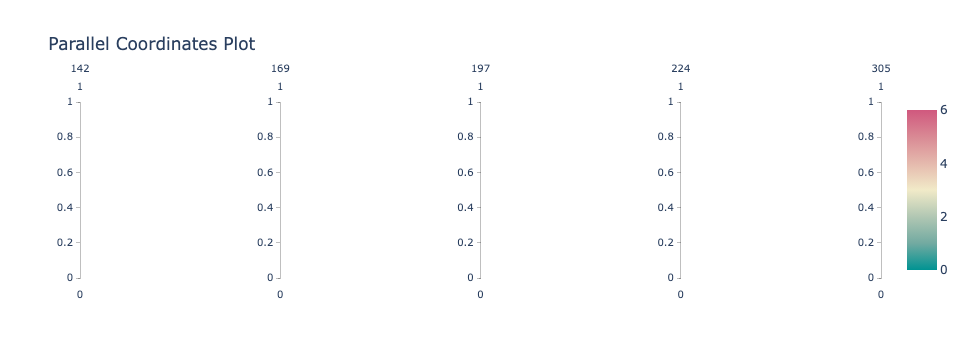

In [87]:
import plotly.graph_objects as go
data = centroids7_df.to_dict('records')

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = centroids7_df['centroid'],
                    colorscale = 'Tealrose',
                    showscale = True,
                    cmin = centroids7_df['centroid'].min(),
                    cmax = centroids7_df['centroid'].max()),
        dimensions = [
            dict(range = [0, 1],
                 label = '142', values = centroids7_df['142']),
            dict(range = [0, 1],
                 label = '169', values = centroids7_df['169']),
            dict(range = [0, 1],
                 label = '197', values = centroids7_df['197']),
            dict(range = [0, 1],
                 label = '224', values = centroids7_df['224']),
            dict(range = [0, 1],
                 label = '305', values = centroids7_df['305'])
        ]
    )
)

# Update layout
fig.update_layout(
    title='Parallel Coordinates Plot',
    coloraxis_colorbar=dict(
        title="Cluster"
    )
)

# Show the plot
fig.show()

In [84]:
import plotly.express as px

clusters_parallel_plot = px.parallel_coordinates(centroids7_df, color = "centroid",
                              dimensions=['142','169','197','224','305'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
clusters_parallel_plot.show()

AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [50]:
centroids7.shape

(7, 784)

In [42]:
#use the below code to compute max distance between clusters

from sklearn.metrics.pairwise import euclidean_distances
# Assuming 'centroids7' and 'centroids8' are your sets of centroids
# Compute pairwise Euclidean distances between centroids from both sets
    k_list = [4,5,6,7]
for i in k_list:
    kmeans_test = KMeans( n_clusters = i, init='k-means++ )
    kmeans_test.fit(x_full,y_full)
    

#distances = euclidean_distances(centroids7, centroids8)
#max_distance = np.max(distances)

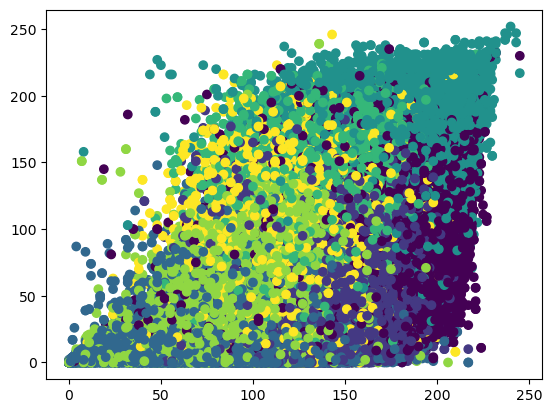

In [14]:
kmeans7_plot = matplotlib.pyplot.scatter( x_full['360'], x_full['530'], c=x_full.kmeans7Cluster)
#c = is what we are coloring by (the given cluster)
#we can make the axes random pixels for now

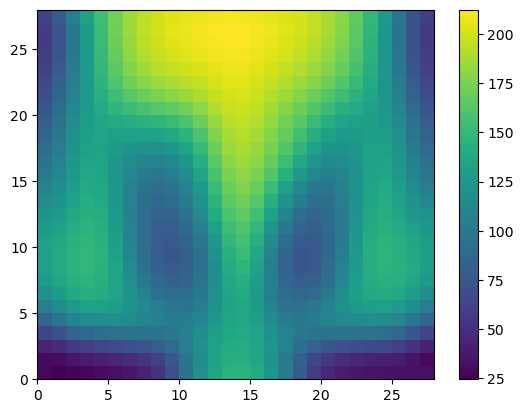

In [20]:
#let's visualize the mean array
arrayAvg = x_full.iloc[:, :-1].mean().values
matrixAvg = np.reshape( arrayAvg, (28,28) )
heat_avg = plt_py.pcolormesh( matrixAvg )
plt_py.colorbar(heat_avg)

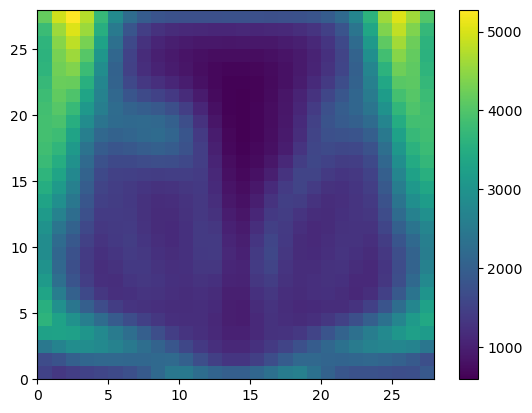

In [21]:
#let's visualize the variance array
arrayVar = x_full.iloc[:, :-1].var().values
matrixVar = np.reshape( arrayVar, (28,28) )
heat_Var = plt_py.pcolormesh( matrixVar )
plt_py.colorbar(heat_Var)

In [36]:
def best_cluster_finder(df):
    i_list = ["100", "110", "120", "130", "140", "150", "160", "170", "180", "190", "200",
    "110", "121", "132", "143", "154", "165", "176", "187", "198", "209", "220",
    "120", "132", "144", "156", "168", "180", "192", "204", "216", "228", "240",
    "130", "143", "156", "169", "182", "195", "208", "221", "234", "247", "260",
    "140", "154", "168", "182", "196", "210", "224", "238", "252", "266", "280",
    "150", "165", "180", "195", "210", "225", "240", "255", "270", "285", "300",
    "160", "176", "192", "208", "224", "240", "256", "272", "288", "304", "320",
    "170", "187", "204", "221", "238", "255", "272", "289", "306", "323", "340",
    "180", "198", "216", "234", "252", "270", "288", "306", "324", "342", "360",
    "190", "209", "228", "247", "266", "285", "304", "323", "342", "361", "380"]
    
    j_list = ["100", "110", "120", "130", "140", "150", "160", "170", "180", "190", "200",
    "110", "121", "132", "143", "154", "165", "176", "187", "198", "209", "220",
    "120", "132", "144", "156", "168", "180", "192", "204", "216", "228", "240",
    "130", "143", "156", "169", "182", "195", "208", "221", "234", "247", "260",
    "140", "154", "168", "182", "196", "210", "224", "238", "252", "266", "280",
    "150", "165", "180", "195", "210", "225", "240", "255", "270", "285", "300",
    "160", "176", "192", "208", "224", "240", "256", "272", "288", "304", "320",
    "170", "187", "204", "221", "238", "255", "272", "289", "306", "323", "340",
    "180", "198", "216", "234", "252", "270", "288", "306", "324", "342", "360",
    "190", "209", "228", "247", "266", "285", "304", "323", "342", "361", "380"]
   # for i, j in i_list, j_list:

#these are the pixel values of the inner most square.      
idx_numbers_center = [
    "99", "109", "119", "129", "139", "149", "159", "169", "179", "189", "199",
    "109", "120", "131", "142", "153", "164", "175", "186", "197", "208", "219",
    "119", "131", "143", "155", "167", "179", "191", "203", "215", "227", "239",
    "129", "142", "155", "168", "181", "194", "207", "220", "233", "246", "259",
    "139", "153", "167", "181", "195", "209", "223", "237", "251", "265", "279",
    "149", "164", "179", "194", "209", "224", "239", "254", "269", "284", "299",
    "159", "175", "191", "207", "223", "239", "255", "271", "287", "303", "319",
    "169", "186", "203", "220", "237", "254", "271", "288", "305", "322", "339",
    "179", "197", "215", "233", "251", "269", "287", "305", "323", "341", "359",
    "189", "208", "227", "246", "265", "284", "303", "322", "341", "360", "379"
]

